In [1]:
import pandas as pd

df = pd.read_csv("data/merged.csv") 


In [14]:
from util.process import MyDataset, Modeling

x_cols = ["EXTN_TPRT", "INNER_HMDT_1"]
y_cols = ["INNER_TPRT_1"]
data = MyDataset(df, x_cols, y_cols)
train_loader, test_loader = data.preprocessing(train_ratio=0.8)

Transformer

In [16]:
from util.model import TransformerModel
modeling = Modeling(model=TransformerModel, 
                    data=data, lr=0.001)

Using device: cpu


c:\Users\32mou\Documents\tomato2023\lib\site-packages\torch\nn\modules\transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
modeling.train(
    epochs=100,
    train_loader=train_loader,
    test_loader=test_loader,
)

Epoch 1/100, Validation Loss: 7.8120
Epoch 11/100, Validation Loss: 6.1880
Epoch 21/100, Validation Loss: 6.9358
Epoch 31/100, Validation Loss: 6.8995
Epoch 41/100, Validation Loss: 6.7086
Epoch 51/100, Validation Loss: 6.7400
Epoch 61/100, Validation Loss: 5.9033
Epoch 71/100, Validation Loss: 5.6111
Epoch 81/100, Validation Loss: 6.4307
Epoch 91/100, Validation Loss: 7.9643


In [ ]:
true_val, pred_val = modeling.eval(test_loader, data.y_test)

explained_variance:  0.8048
mean_squared_log_error:  0.0129
r2:  0.7494
MAE:  2.0537
MSE:  6.594
RMSE:  2.5679


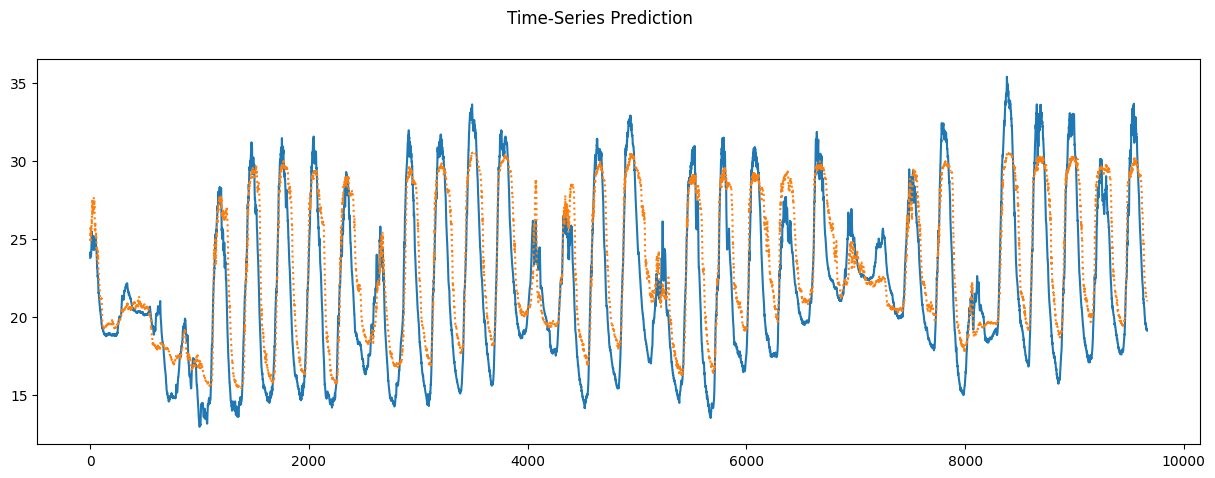

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5)) 
plt.plot(true_val)
plt.plot(pred_val, linestyle='dotted')
plt.suptitle('Time-Series Prediction')
plt.show()

In [7]:
del modeling

LSTM

In [8]:
from util.model import LSTM
modeling = Modeling(model=LSTM, 
                    data=data, lr=0.001)

Using device: cuda


In [9]:
modeling.train(
    epochs=100,
    train_loader=train_loader,
    test_loader=test_loader,
)

Epoch 1/100, Validation Loss: 464.3902
Epoch 11/100, Validation Loss: 122.7613
Epoch 21/100, Validation Loss: 27.8743
Epoch 31/100, Validation Loss: 12.5741
Epoch 41/100, Validation Loss: 11.4872
Epoch 51/100, Validation Loss: 10.4764
Epoch 61/100, Validation Loss: 6.7536
Epoch 71/100, Validation Loss: 6.9411
Epoch 81/100, Validation Loss: 6.4475
Epoch 91/100, Validation Loss: 6.6349


In [10]:
true_val, pred_val = modeling.eval(test_loader, data.y_test)

explained_variance:  0.7606
mean_squared_log_error:  0.0109
r2:  0.7603
MAE:  2.027
MSE:  6.3083
RMSE:  2.5116


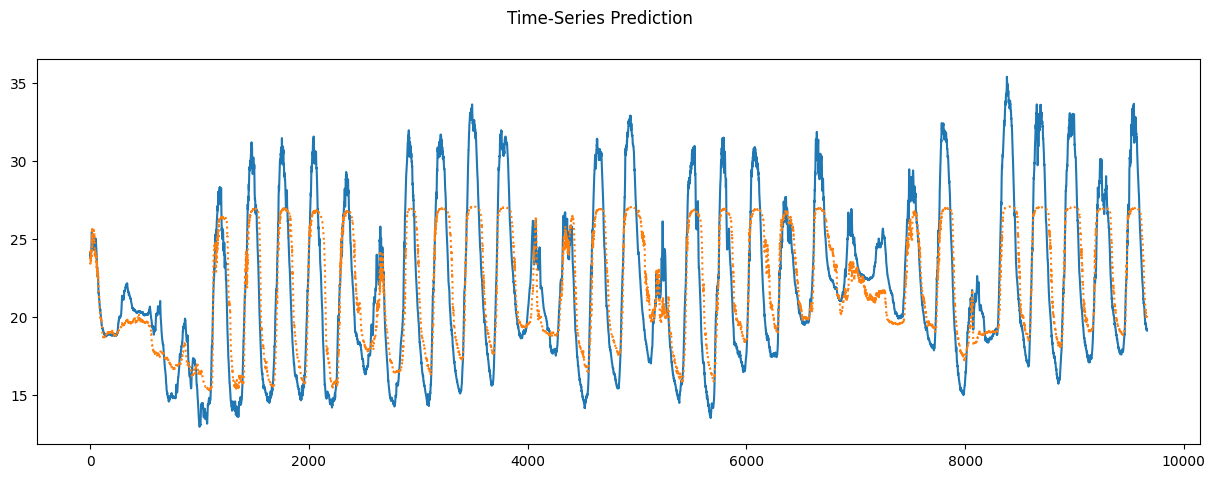

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5)) 
plt.plot(true_val)
plt.plot(pred_val, linestyle='dotted')
plt.suptitle('Time-Series Prediction')
plt.show()

In [ ]:
del modeling

binary classfication
- input: 환경 정보
- output: 보조기 작동여부 (SUB_MHRLS_OPRT_YN)
  - 0 또는 1

In [2]:
environment = {
        "PFBS_NTRO_CBDX_CTRN": "관측지점실내이산화탄소농도",
        "ABSLT_HMDT": "절대습도",
        "INNER_HMDT_1": "내부습도_1",
        "INNER_HMDT_2": "내부습도_2",
        "AVE_INNER_HMDT_1_2": "평균내부습도_1_2",
        "WNDRC": "풍향",
        "WDSP": "풍속",
        "STRTN_WATER": "포화수분",
        "EXTN_SRQT": "외부일사량",
        "WATER_LACK_VL": "수분부족량",
        "EXTN_ACCMLT_QOFLG": "외부누적광량",
        "PRCPT_YN": "강수여부",
        "DWP_TPRT": "이슬점온도",
        "EXTN_TPRT": "외부온도",
        "INNER_TPRT_1": "내부온도_1",
        "INNER_TPRT_2": "내부온도_2",
        "AVE_INNER_TPRT_1_2": "평균내부온도_1_2",
}

In [3]:
df["SUB_MHRLS_OPRT_YN"] = df[["SUB_MHRLS_OPRT_YN_1","SUB_MHRLS_OPRT_YN_2", "SUB_MHRLS_OPRT_YN_3"]].apply(
    lambda x: 0 if 0 in x.values else 1, axis=1)


print(df["SUB_MHRLS_OPRT_YN"].value_counts())
var = df["SUB_MHRLS_OPRT_YN"].var()
for k in environment.keys():
    covariance = df["SUB_MHRLS_OPRT_YN"].cov(df[k])
    print(f"{environment[k]}: \t Cov is {covariance:.4f} \t Beta is {covariance/var:.4f}")

SUB_MHRLS_OPRT_YN
0    28940
1    19444
Name: count, dtype: int64
관측지점실내이산화탄소농도: 	 Cov is -10.7342 	 Beta is -44.6559
절대습도: 	 Cov is 0.5911 	 Beta is 2.4592
내부습도_1: 	 Cov is -0.5594 	 Beta is -2.3271
내부습도_2: 	 Cov is -0.2534 	 Beta is -1.0540
평균내부습도_1_2: 	 Cov is -0.4064 	 Beta is -1.6905
풍향: 	 Cov is -1.3323 	 Beta is -5.5427
풍속: 	 Cov is 0.0189 	 Beta is 0.0787
포화수분: 	 Cov is 0.9000 	 Beta is 3.7442
외부일사량: 	 Cov is 21.0940 	 Beta is 87.7546
수분부족량: 	 Cov is 0.3086 	 Beta is 1.2840
외부누적광량: 	 Cov is 65.9143 	 Beta is 274.2143
강수여부: 	 Cov is 0.0142 	 Beta is 0.0593
이슬점온도: 	 Cov is 0.6378 	 Beta is 2.6535
외부온도: 	 Cov is 2.0061 	 Beta is 8.3456
내부온도_1: 	 Cov is 0.7847 	 Beta is 3.2645
내부온도_2: 	 Cov is 0.7182 	 Beta is 2.9877
평균내부온도_1_2: 	 Cov is 0.7514 	 Beta is 3.1261


In [7]:
from util.process import MyDataset, Modeling
from util.model import LSTM

x_cols = environment.keys()
y_cols = ["SUB_MHRLS_OPRT_YN"]
data = MyDataset(df, x_cols, y_cols)
train_loader, test_loader = data.preprocessing(train_ratio=0.8)

In [8]:
model = Modeling(LSTM, data, taskType="classification")
model.train(100, train_loader, test_loader)

Using device: cpu
Epoch 1/100, Validation Loss: 0.0000
Epoch 11/100, Validation Loss: 0.0000
Epoch 21/100, Validation Loss: 0.0000
Epoch 31/100, Validation Loss: 0.0000
Epoch 41/100, Validation Loss: 0.0000
Epoch 51/100, Validation Loss: 0.0000
Epoch 61/100, Validation Loss: 0.0000
Epoch 71/100, Validation Loss: 0.0000
Epoch 81/100, Validation Loss: 0.0000
Epoch 91/100, Validation Loss: 0.0000


In [9]:
true_val, pred_val = model.eval(test_loader, data.y_test)

explained_variance:  -0.0859
r2:  -10.629
MAE:  0.3282
MSE:  0.1097
RMSE:  0.3311


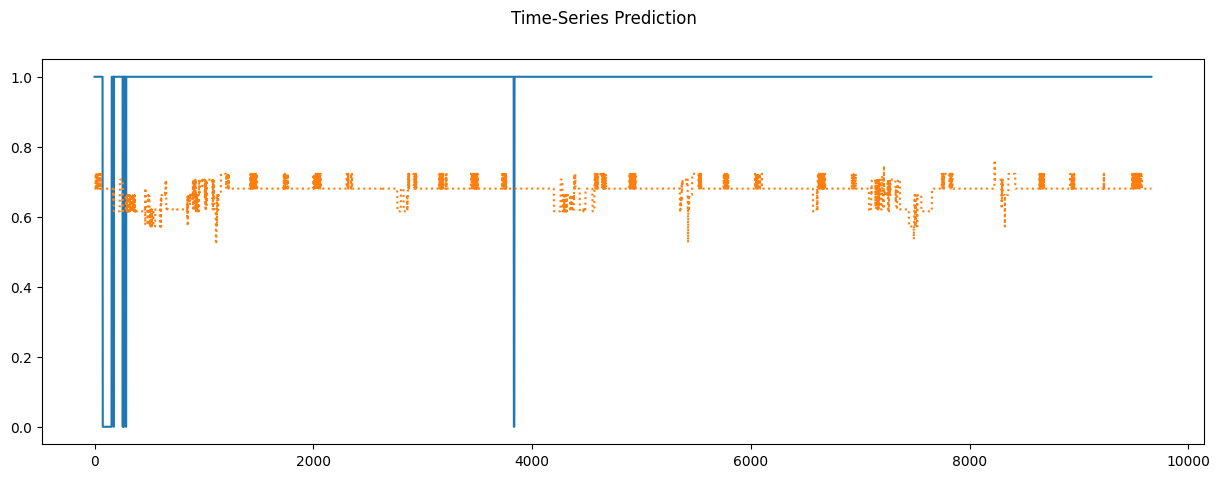

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5)) 
plt.plot(true_val)
plt.plot(pred_val, linestyle='dotted')
plt.suptitle('Time-Series Prediction')
plt.show()